In [1]:
import matplotlib.pyplot as plt
import pandas as pd
folder= "../../../../../应用/Overleaf/" + "Benchmarking RL Spatial Index"

In [2]:
def plot_data(input_data_path, input_query_path, output_file_paths):
    plt.figure(dpi=100) 

    # plt.rcParams["figure.figsize"] = (3,6)
    
    data = pd.read_csv(input_data_path, header=None)  
    plt.scatter(data[1], data[0], s=1) 

    if input_query_path:
        queries = pd.read_csv(input_query_path, header=None) 
        queries = queries.sample(n=400, replace=True) 
        
        for index, row in queries.iterrows():
            x1, y1, x2, y2 = row[0], row[1], row[2], row[3]
            lower_left_x = min(x1, x2)
            lower_left_y = min(y1, y2)
            width = abs(x2 - x1)
            height = abs(y2 - y1)
            
            rect = plt.Rectangle((lower_left_x, lower_left_y), width, height, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)

    # plt.title('Spatial Dataset Plot')
    # plt.xlabel('X coordinate')
    # plt.ylabel('Y coordinate')
    

    plt.axis('equal')

    plt.gca().set_xticks([]) 
    plt.gca().set_yticks([]) 

    if output_file_paths:
        for output_file_path in output_file_paths:
            if output_file_path.endswith(".pdf"):
                plt.savefig(output_file_path, format='pdf', bbox_inches='tight')
            if output_file_path.endswith(".png"):
                plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.show() 
    plt.close() 

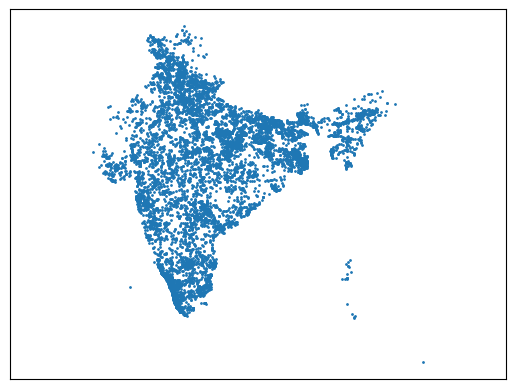

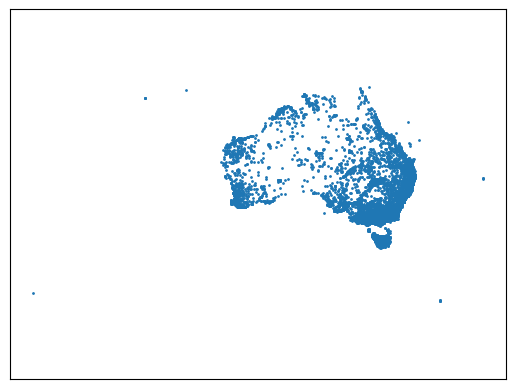

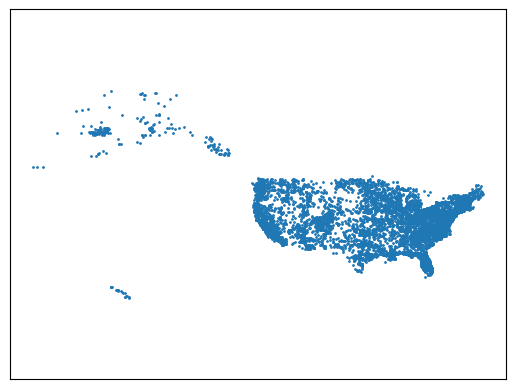

In [3]:
files = [
    # {'data':'../data/real/dataset/OSM_10000.csv', 'query':'../data/real/query/OSM_10000_range_1000_2_uniform_1_0.01x0.01.csv',
    # 'output':'../figs/data/OSM_10000.pdf'},
    # {'data':'../data/real/dataset/OSM_10000.csv', 'query':'',
    # 'output':'../figs/data/OSM_10000_with_query.pdf'},
    # {'data':'../data/synthetic/dataset/data_10000_2_uniform_1.csv', 'query':'../data/synthetic/query/range_1000_2_normal_1_0.01x0.01.csv',
    # 'output':'../figs/data/data_10000_2_uniform_1.pdf'},
    # {'data':'../data/synthetic/dataset/data_10000_2_uniform_1.csv', 'query':'',
    # 'output':'../figs/data/data_10000_2_uniform_1_with_query.pdf'},
    # {'data':'../data/real/dataset/australia_10000.csv', 'query':'',
    # 'output':'../figs/data/australia_10000.pdf'},   
    {'data':'../example_data/india_10000.csv', 'query':'',
    'output':'../figs/data_img/india_10000.pdf'},    
    {'data':'../example_data/australia_10000.csv', 'query':'',
    'output':'../figs/data_img/us_10000.pdf'},   
    {'data':'../example_data/us_10000.csv', 'query':'',
    'output':'../figs/data_img/us_10000.pdf'},   
]

for filemap in files:
    plot_data(filemap['data'], filemap['query'], [filemap['output']])

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
def plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_paths, titles):
    assert len(input_data_paths) == len(input_query_paths) == 3, "There must be exactly three data and query paths."
    
    fig = plt.figure(figsize=(18, 6), dpi=100) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1.2, 1]) 

    for i in range(3):
        gs = gridspec.GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1, 4],
                               left=0.1 + i * 0.3, right=0.4 + i * 0.3, wspace=0.02, hspace=0.02)
        main_ax = fig.add_subplot(gs[1, 0])  
        histx_ax = fig.add_subplot(gs[0, 0], sharex=main_ax) 
        histy_ax = fig.add_subplot(gs[1, 1], sharey=main_ax)  
        
        data = pd.read_csv(input_data_paths[i], header=None)
        scatter = main_ax.scatter(data[1], data[0], s=10, alpha=0.6,edgecolor='none') 

        histx_ax.hist(data[1], bins=40, alpha=0.7, color='gray')
        histx_ax.axis('off') 

        histy_ax.hist(data[0], bins=40, orientation='horizontal', alpha=0.7, color='gray')
        histy_ax.axis('off') 

        if input_query_paths[i]:
            queries = pd.read_csv(input_query_paths[i], header=None)
            queries = queries.sample(n=400, replace=True)
            for index, row in queries.iterrows():
                x1, y1, x2, y2 = row[1], row[0], row[3], row[2]
                rect = plt.Rectangle((min(x1, x2), min(y1, y2)), abs(x2 - x1), abs(y2 - y1),
                                     linewidth=1, edgecolor='red', facecolor='none')
                main_ax.add_patch(rect)

        if input_insertion_paths[i]:
            insertions = pd.read_csv(input_insertion_paths[i], header=None)
            main_ax.scatter(insertions[1], insertions[0], c='red', s=10, marker='o')  # Plot insertion points

        main_ax.set_xticks([]) 
        main_ax.set_yticks([]) 
        main_ax.set_title(titles[i], pad=65, fontsize=24)

    # plt.tight_layout() 

    if output_file_paths:
        for output_file_path in output_file_paths:
            if output_file_path.endswith(".pdf"):
                plt.savefig(output_file_path, format='pdf', bbox_inches='tight')
            if output_file_path.endswith(".png"):
                plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.show()  # Display the figure
    plt.close(fig)  # Close the figure to free up memory

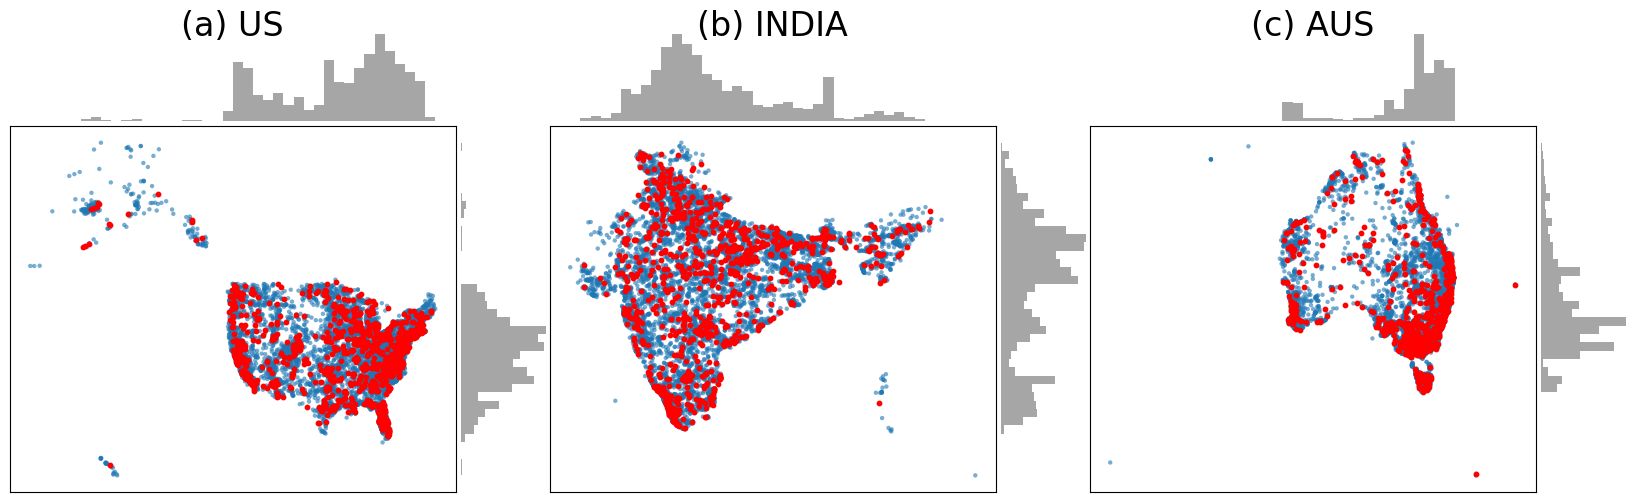

In [5]:
input_data_paths = ['../example_data/us_10000.csv', '../example_data/india_10000.csv', '../example_data/australia_10000.csv']
input_query_paths = ['../example_data/us_10000_range_100_2_uniform_1_1.0x1.0.csv', '../example_data/india_10000_range_100_2_uniform_1_1.0x1.0.csv', '../example_data/australia_10000_range_100_2_uniform_1_1.0x1.0.csv']
input_query_paths = ['','','']
input_insertion_paths = ['../example_data/us_10000_insert_1000_2_uniform_1.csv',
                         '../example_data/india_10000_insert_1000_2_uniform_1.csv',
                         '../example_data/australia_10000_insert_1000_2_uniform_1.csv']
# input_insertion_paths = ['','','']
output_file_paths = ['../figs/data_img/real_dataset_10000_hist_point.png', folder + "/figs/real_dataset_10000_hist_point.pdf"]
titles = ["(a) US", "(b) INDIA", "(c) AUS"]
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_paths, titles)

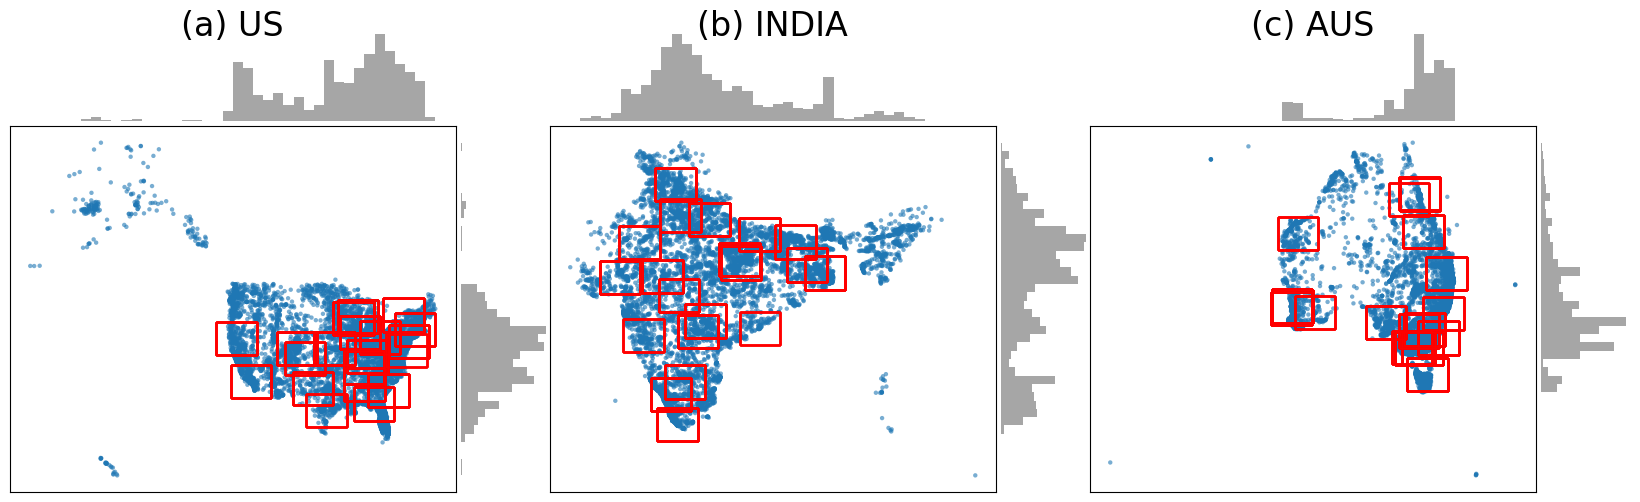

In [6]:
input_data_paths = ['../example_data/us_10000.csv', '../example_data/india_10000.csv', '../example_data/australia_10000.csv']
input_query_paths = [ '../example_data/us_10000_range_20_2_uniform_1_0.1x0.1.csv', '../example_data/india_10000_range_20_2_uniform_1_0.1x0.1.csv', '../example_data/australia_10000_range_20_2_uniform_1_0.1x0.1.csv']
# input_query_paths = ['','','']
input_insertion_paths = ['../example_data/us_10000_insert_1000_2_uniform_1.csv',
                         '../example_data/india_10000_insert_1000_2_uniform_1.csv',
                         '../example_data/australia_10000_insert_1000_2_uniform_1.csv']
input_insertion_paths = ['','','']
titles = ["(a) US", "(b) INDIA", "(c) AUS"]
output_file_paths = ['../figs/data_img/real_dataset_10000_hist_range.png', folder + "/figs/real_dataset_10000_hist_range.pdf"]
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_paths,titles)

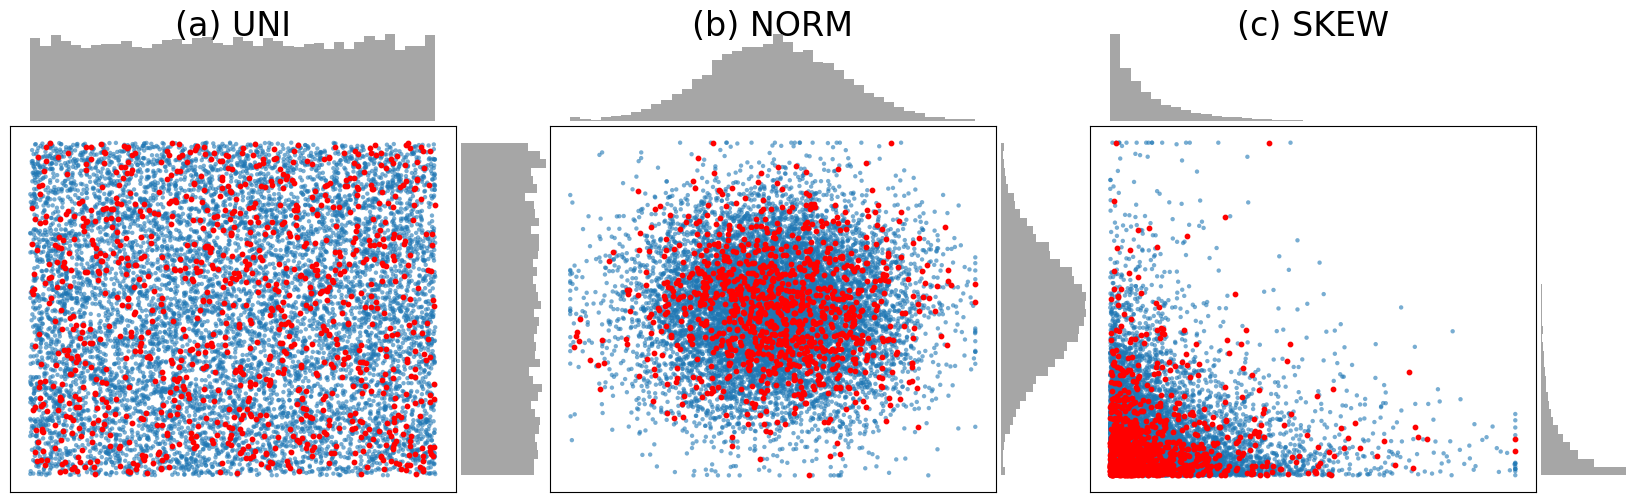

In [7]:
input_data_paths = ['../example_data/data_10000_2_uniform_1.csv', '../example_data/data_10000_2_normal_1.csv', '../example_data/data_10000_2_skewed_4.csv']
input_query_paths = ['../example_data/range_100_2_uniform_1_0.1x0.1.csv', '../example_data/range_100_2_normal_1_0.1x0.1.csv', '../example_data/range_100_2_skewed_4_0.1x0.1.csv']
input_query_paths = ['','','']
input_insertion_paths = ['../example_data/insert_1000_2_uniform_1.csv',
                        '../example_data/insert_1000_2_normal_1.csv',
                         '../example_data/insert_1000_2_skewed_4.csv']
# input_insertion_paths = ['','','']
titles = ["(a) UNI", "(b) NORM" , "(c) SKEW"]
output_file_paths = ['../figs/data_img/synthetic_dataset_10000_hist_point.png', folder + "/figs/synthetic_dataset_10000_hist_point.pdf"] 
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_paths, titles)

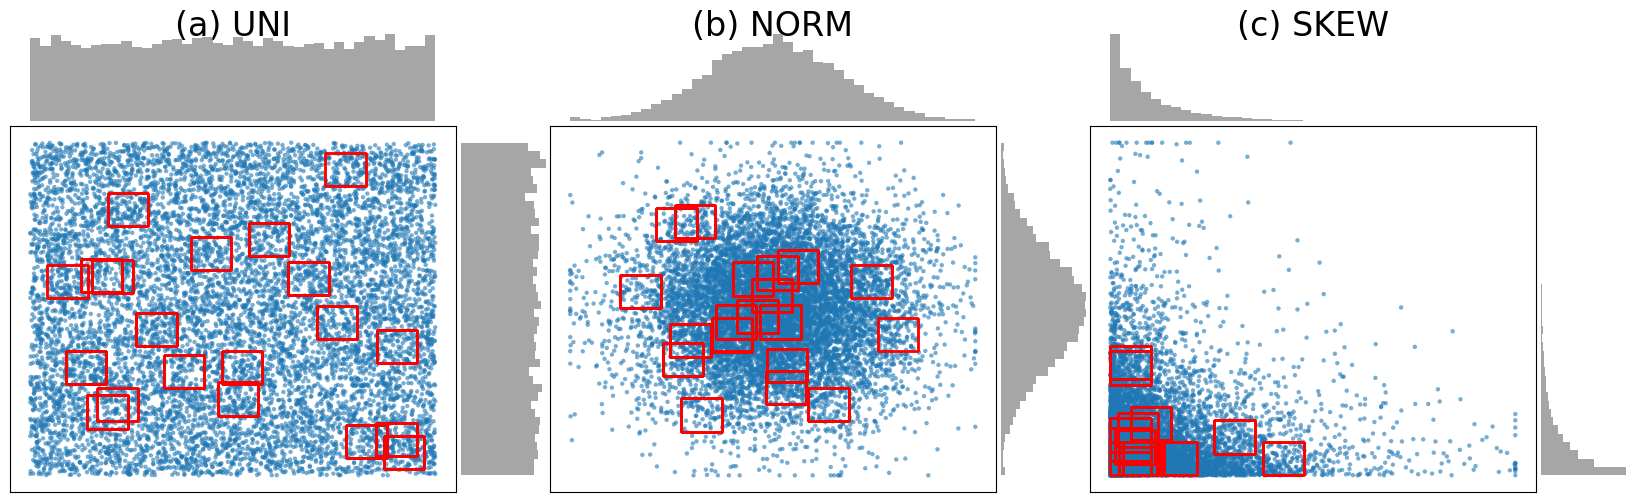

In [8]:
input_data_paths = ['../example_data/data_10000_2_uniform_1.csv', '../example_data/data_10000_2_normal_1.csv', '../example_data/data_10000_2_skewed_4.csv']
input_query_paths = ['../example_data/range_20_2_uniform_1_0.1x0.1.csv', '../example_data/range_20_2_normal_1_0.1x0.1.csv', '../example_data/range_20_2_skewed_4_0.1x0.1.csv']
# input_query_paths = ['','','']
input_insertion_paths = ['../example_data/insert_1000_2_uniform_1.csv',
                         '../example_data/insert_1000_2_normal_1.csv',
                         '../example_data/insert_1000_2_skewed_2.csv']
input_insertion_paths = ['','','']
titles = ["(a) UNI", "(b) NORM" , "(c) SKEW"]
output_file_paths = ['../figs/data_img/synthetic_dataset_10000_hist_range.png', folder + "/figs/synthetic_dataset_10000_hist_range.pdf"] 
plot_data(input_data_paths, input_query_paths, input_insertion_paths, output_file_paths, titles)

In [9]:
def plot_data_all(input_data_paths, input_query_paths, input_insertion_paths, output_file_paths, titles):
    
    fig = plt.figure(figsize=(18, 12), dpi=100) 
    gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1.2, 1]) 

    for i in range(6):
        row = i // 3
        col = i % 3
        gs = gridspec.GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1, 4],
                               left=0.1 + col * 0.3, right=0.4 + col * 0.3, 
                           top=0.9 - row * 0.45, bottom=0.48 - row * 0.45, wspace=0.02, hspace=0.02)
        main_ax = fig.add_subplot(gs[1, 0])  
        histx_ax = fig.add_subplot(gs[0, 0], sharex=main_ax) 
        histy_ax = fig.add_subplot(gs[1, 1], sharey=main_ax)  
        
        data = pd.read_csv(input_data_paths[i], header=None)
        scatter = main_ax.scatter(data[1], data[0], s=10, alpha=0.6,edgecolor='none') 

        histx_ax.hist(data[1], bins=40, alpha=0.7, color='gray')
        histx_ax.axis('off') 

        histy_ax.hist(data[0], bins=40, orientation='horizontal', alpha=0.7, color='gray')
        histy_ax.axis('off') 

        if input_query_paths[i]:
            queries = pd.read_csv(input_query_paths[i], header=None)
            queries = queries.sample(n=400, replace=True)
            for index, row in queries.iterrows():
                x1, y1, x2, y2 = row[1], row[0], row[3], row[2]
                rect = plt.Rectangle((min(x1, x2), min(y1, y2)), abs(x2 - x1), abs(y2 - y1),
                                     linewidth=1, edgecolor='red', facecolor='none')
                main_ax.add_patch(rect)

        if input_insertion_paths[i]:
            insertions = pd.read_csv(input_insertion_paths[i], header=None)
            main_ax.scatter(insertions[1], insertions[0], c='red', s=10, marker='o')  # Plot insertion points

        main_ax.set_xticks([]) 
        main_ax.set_yticks([]) 
        # main_ax.set_title(titles[i], pad=65, fontsize=24)
        main_ax.set_xlabel(titles[i], fontsize=24)

    # plt.tight_layout() 

    if output_file_paths:
        for output_file_path in output_file_paths:
            if output_file_path.endswith(".pdf"):
                plt.savefig(output_file_path, format='pdf', bbox_inches='tight')
            if output_file_path.endswith(".png"):
                plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.show()  # Display the figure
    plt.close(fig)  # Close the figure to free up memory

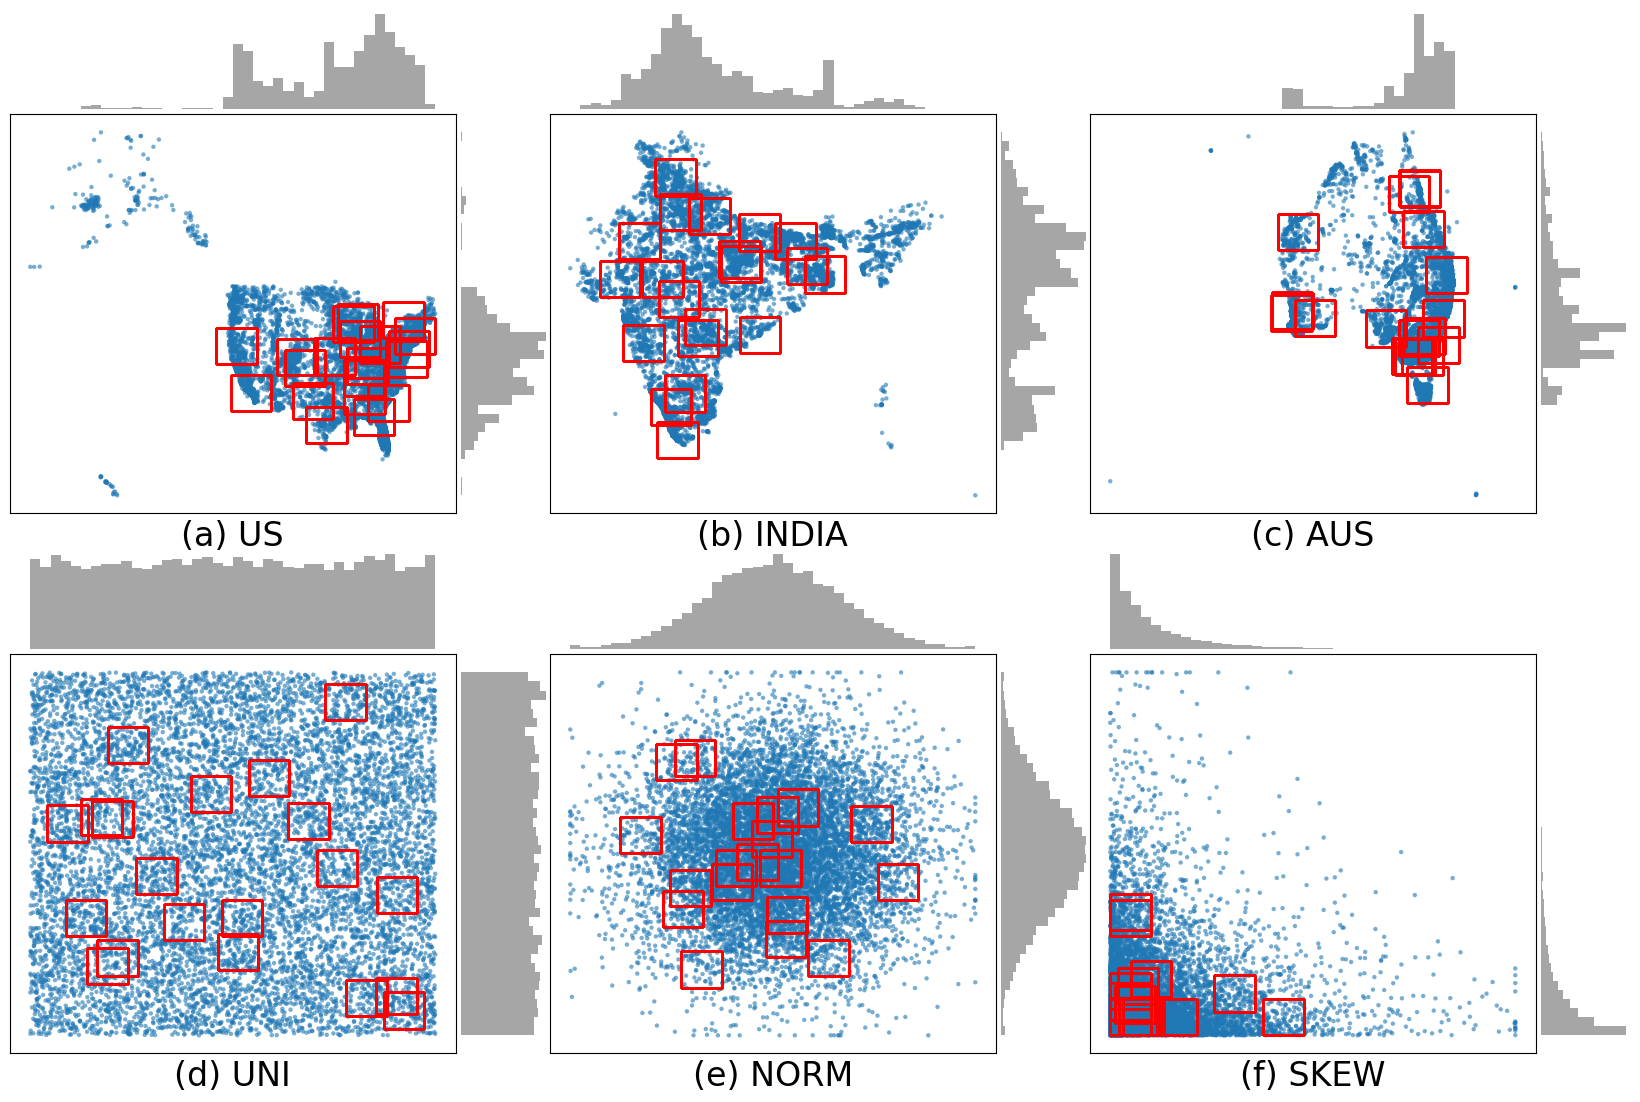

In [10]:
input_data_paths = ['../example_data/us_10000.csv', '../example_data/india_10000.csv', '../example_data/australia_10000.csv',
                    '../example_data/data_10000_2_uniform_1.csv', '../example_data/data_10000_2_normal_1.csv', '../example_data/data_10000_2_skewed_4.csv']
input_query_paths = ['../example_data/us_10000_range_20_2_uniform_1_0.1x0.1.csv', '../example_data/india_10000_range_20_2_uniform_1_0.1x0.1.csv', '../example_data/australia_10000_range_20_2_uniform_1_0.1x0.1.csv',
                     '../example_data/range_20_2_uniform_1_0.1x0.1.csv', '../example_data/range_20_2_normal_1_0.1x0.1.csv', '../example_data/range_20_2_skewed_4_0.1x0.1.csv']

input_insertion_paths = ['../example_data/us_10000_insert_1000_2_uniform_1.csv',
                         '../example_data/india_10000_insert_1000_2_uniform_1.csv',
                         '../example_data/australia_10000_insert_1000_2_uniform_1.csv',
                         '../example_data/insert_1000_2_uniform_1.csv',
                         '../example_data/insert_1000_2_normal_1.csv',
                         '../example_data/insert_1000_2_skewed_2.csv']
input_insertion_paths = ['','','','','','']
titles = ["(a) US", "(b) INDIA", "(c) AUS", "(d) UNI", "(e) NORM" , "(f) SKEW"]
output_file_paths = ['../figs/data_img/all_dataset_10000_hist_range.png', folder + "/figs/all_dataset_10000_hist_range.pdf"] 
plot_data_all(input_data_paths, input_query_paths, input_insertion_paths, output_file_paths, titles)

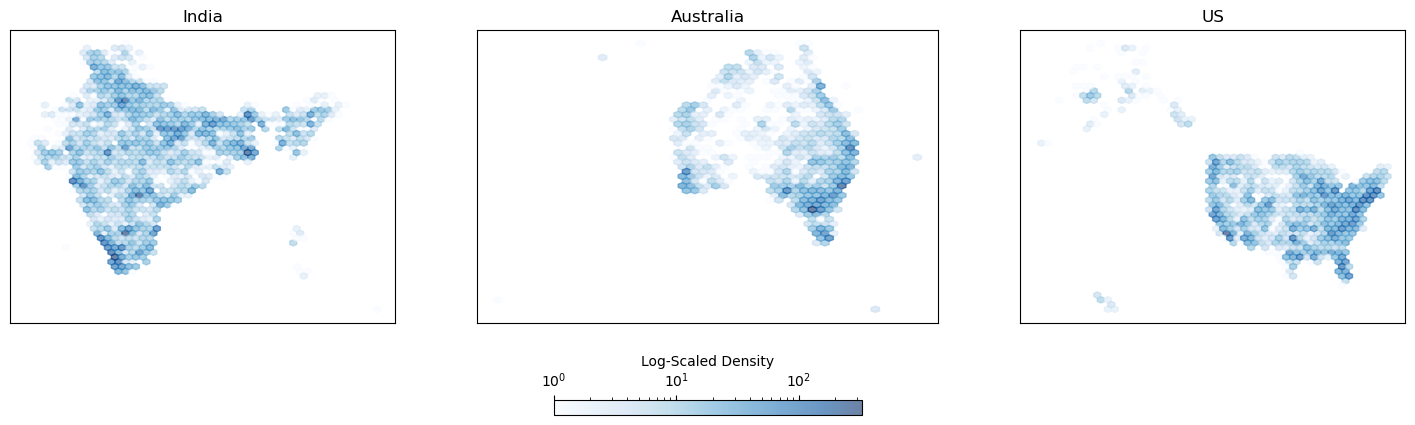

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


def plot_data_dens(input_data_paths, output_file_paths, titles):
    assert len(input_data_paths) == 3, "There must be exactly three data paths."
    
    fig = plt.figure(figsize=(18, 5), dpi=100) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1.2, 1]) 

    for i, data_path in enumerate(input_data_paths):
        ax = fig.add_subplot(gs[i])  
        data = pd.read_csv(data_path, header=None)
        
        hb = ax.hexbin(data[1], data[0], gridsize=50, cmap='Blues', norm=LogNorm(), alpha=0.6)
        
        ax.set_title(titles[i])  
        ax.set_xticks([]) 
        ax.set_yticks([]) 

    cbar = fig.colorbar(hb, ax=fig.axes, orientation='horizontal', pad=0.2, fraction=0.04)
    cbar.set_label('Log-Scaled Density')
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')

    if output_file_paths:
        for output_file_path in output_file_paths:
            if output_file_path.endswith(".pdf"):
                plt.savefig(output_file_path, format='pdf', bbox_inches='tight')
            if output_file_path.endswith(".png"):
                plt.savefig(output_file_path, format='png', bbox_inches='tight')
    plt.show()  
    plt.close(fig)  


input_data_paths = ['../example_data/india_10000.csv', '../example_data/australia_10000.csv', '../example_data/us_10000.csv']
output_file_paths = ['../figs/data_img/real_dataset_10000_density.png']
plot_data_dens(input_data_paths, output_file_paths, ["India", "Australia", "US"])

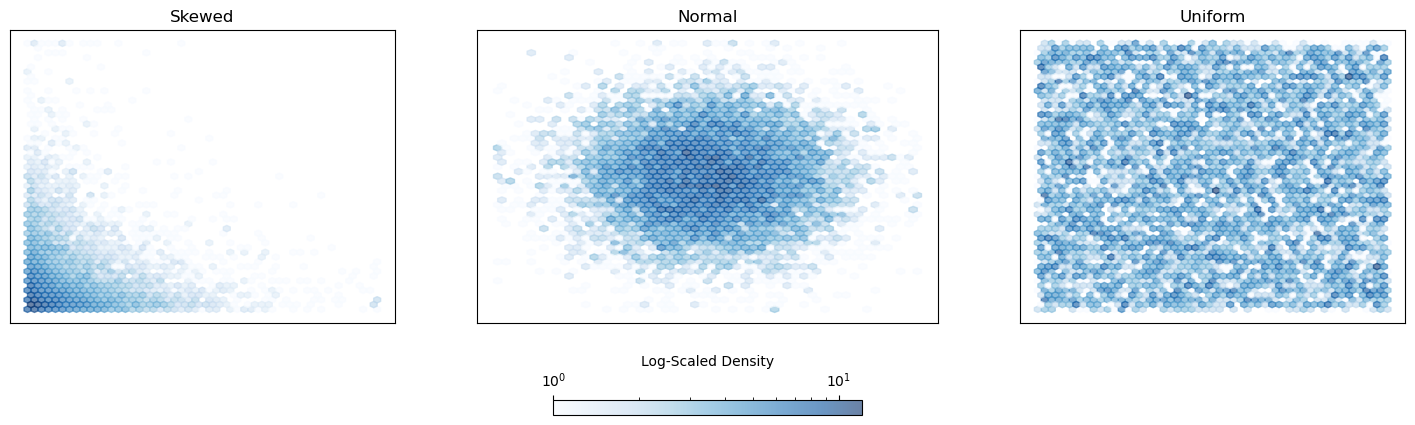

In [12]:
input_data_paths = ['../example_data/data_10000_2_skewed_4.csv', '../example_data/data_10000_2_normal_1.csv', '../example_data/data_10000_2_uniform_1.csv']
output_file_paths = ['../figs/data_img/synthetic_dataset_10000_density.png']
plot_data_dens(input_data_paths, output_file_paths, ["Skewed", "Normal", "Uniform"])
